In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import os

In [3]:
# name = 'Original_Pretrained_R2plus1DMotionSegNet.pth.csv'
name = 'dropout_v3_0_10_R2plus1DMotionSegNet.pth.csv'

data = pd.read_csv(f'./csvs/{name}')

pred_ef = 'Predicted EF'
true_ef = 'True EF'

pred_gls = 'Predicted GLS'
true_gls = 'True GLS'

warp_gls = "Warp GLS"

In [4]:
data.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,58.691813,55.594031,-0.143555,-0.158536,-0.131834,0.935416,0.910252,0.936966,0.914176
std,11.525246,12.158651,0.332415,0.347926,0.558579,0.030448,0.045519,0.028557,0.042816
min,13.059849,10.192957,-0.453947,-0.407895,-0.678832,0.684939,0.461274,0.726174,0.464069
25%,53.657365,51.884729,-0.198276,-0.212963,-0.196991,0.923563,0.892637,0.924815,0.897967
50%,60.807485,58.752419,-0.160153,-0.179366,-0.160920,0.942165,0.920359,0.942781,0.923880
75%,66.312424,63.539142,-0.118206,-0.141208,-0.118413,0.955529,0.940183,0.956693,0.941875
max,100.000000,84.452354,10.642857,8.538462,17.714286,0.990106,0.976261,0.981025,0.975726


In [26]:
def bland_altman(df, label1, label2, save=False, postfix=''):
    '''
    input:
        df - pandas dataframe
        label1 - string of key to access array1 of vals
        label2 - string of key to access array2 of vals
        save - boolean of whether to save figure as a SVG image file
    output:
        scatter plot of data, with a line of best fit and a R^2 (coefficient of correlation)
    '''
    
    plt.figure(figsize=(10,8))
    plt.xlabel(label1, fontsize=10)
    plt.ylabel(label2, fontsize=10)
    
    # line of best fit
    
    if (max(df[label1])) > (max(df[label2])):
        max_ = (max(df[label1]))
    else:
        max_ = (max(df[label2]))
    if min(df[label1]) < min(df[label2]):
        min_ = min(df[label1])
    else:
        min_ = min(df[label2])
        
    num_points = 1000
    points = np.linspace(min_,max_,num_points)
    plt.plot(points,points,'r',linewidth=3,zorder=1)
    # print(f'tmp: {tmp}')
    # plt.plot([i for i in range(tmp)], [i for i in range(tmp)], 'r', linewidth=3, zorder=1)
    
    # scatter plot of data
    plt.scatter(df[label1], df[label2], zorder=2)
    
    # correlation of coefficient R
    r = df.corr()[label1][label2]
    plt.text(-.13, -.30, f'r = {r}', fontsize=20)
    
    if save:
        plt.savefig(f'./images/bland_altmans/{name}_{postfix}.svg')

In [27]:
# remove bottom 1% and top 1% of data to remove outliers (quartile filter)
# for both label2
df0 = data
q_low_true_gls = df0[true_gls].quantile(0.01)
q_hi_true_gls  = df0[true_gls].quantile(0.99)

df1 = df0[(df0[true_gls] < q_hi_true_gls) & (df0[true_gls] > q_low_true_gls)]

q_low_warp_gls = df1[warp_gls].quantile(0.01)
q_hi_warp_gls  = df1[warp_gls].quantile(0.99)

df2 = df1[(df1[warp_gls] < q_hi_warp_gls) & (df1[warp_gls] > q_low_warp_gls)]

data_final = df2

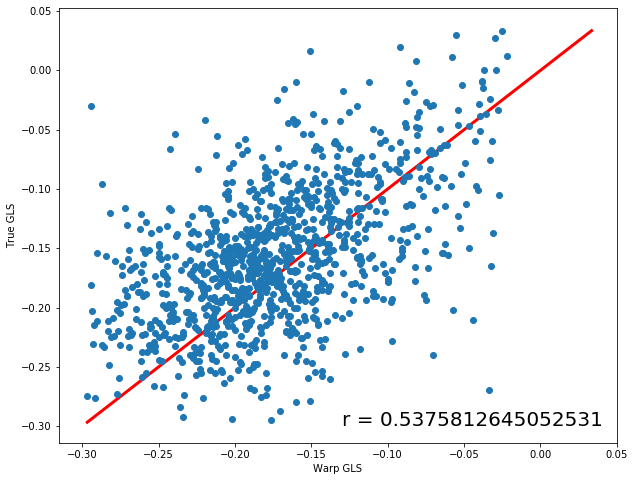

In [29]:
# bland_altman(data, pred_ef, true_ef, save=False)
bland_altman(data_final, warp_gls, true_gls, save=True, postfix='warp_true_gls')

In [8]:
df1.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,58.740621,55.625950,-0.143423,-0.158534,-0.156322,0.935866,0.911453,0.937267,0.915384
std,11.400750,12.020565,0.335587,0.351100,0.058624,0.029435,0.042446,0.028315,0.039432
min,13.059849,10.192957,-0.453947,-0.351852,-0.294872,0.713881,0.629409,0.726174,0.626709
25%,53.675702,51.884729,-0.198154,-0.212389,-0.195652,0.923949,0.893621,0.925073,0.898673
50%,60.849388,58.732141,-0.160000,-0.179245,-0.160920,0.942453,0.920660,0.942838,0.924323
75%,66.312424,63.499253,-0.118280,-0.141304,-0.120370,0.955571,0.940429,0.957043,0.942068
max,100.000000,79.707329,10.642857,8.538462,0.033557,0.990106,0.976261,0.981025,0.975726


In [9]:
df2.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,58.810415,55.723930,-0.153617,-0.174241,-0.156614,0.935945,0.911018,0.937298,0.915149
std,11.294580,11.891857,0.074128,0.055676,0.057604,0.029503,0.042649,0.028385,0.039580
min,13.059849,10.661108,-0.453947,-0.296703,-0.294872,0.713881,0.629409,0.726174,0.626709
25%,53.840057,52.182593,-0.197802,-0.211634,-0.195652,0.924281,0.893165,0.925103,0.898366
50%,60.849388,58.752419,-0.160153,-0.179245,-0.161017,0.942580,0.920403,0.942853,0.924204
75%,66.308652,63.495814,-0.118864,-0.142857,-0.120832,0.955619,0.940227,0.957266,0.941910
max,100.000000,79.707329,0.893617,-0.021739,0.033557,0.990106,0.976261,0.981025,0.975726


In [10]:
data.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,58.691813,55.594031,-0.143555,-0.158536,-0.131834,0.935416,0.910252,0.936966,0.914176
std,11.525246,12.158651,0.332415,0.347926,0.558579,0.030448,0.045519,0.028557,0.042816
min,13.059849,10.192957,-0.453947,-0.407895,-0.678832,0.684939,0.461274,0.726174,0.464069
25%,53.657365,51.884729,-0.198276,-0.212963,-0.196991,0.923563,0.892637,0.924815,0.897967
50%,60.807485,58.752419,-0.160153,-0.179366,-0.160920,0.942165,0.920359,0.942781,0.923880
75%,66.312424,63.539142,-0.118206,-0.141208,-0.118413,0.955529,0.940183,0.956693,0.941875
max,100.000000,84.452354,10.642857,8.538462,17.714286,0.990106,0.976261,0.981025,0.975726
